#  The Frog Problem

https://www.youtube.com/watch?v=ZLTyX4zL2Fc&t=188s

This is my solution to Matt Parker's (@standupmaths) problem, or the problem given to Timandra Harkness about a frog that is crossing the river.  There are nine lily pads between the frog and the opposite bank, so the frog needs at most ten hops to cross the river.  The frog only moves forwards, and at any time she selects the lily pad to jump to, or the opposite bank directly, equally at random.  The she jumps there.  Once there, she selects the next lily pad, or the opposite bank, at random and jumps again.  

On average, how many jumps are needed to cross the river?  Is there an explicit formula?  How does this vary for different numbers of lily pads? 

## My solution

Let $J_n$ denote the expected number of hops needed for $n$ lily pads between the two river banks.  So we have that $J_0 = 1$, as the frog has no choice but to jump directly across.  We can calculate that 
$$J_1 = \frac{1}{2}\cdot 1 + \frac{1}{2}(1 + J_0) = \frac{3}{2}.$$
(Either the frog jumps directly, and is done, or jumps the the lily pad in the middle fo the banks, and then we are back to the initial case.)  

Similarly, we have
$$J_2 = \frac{1}{3}\cdot 1 + \frac{1}{3}(1+J_1) + \frac{1}{3}(1+J_0).$$

In general, for $n \geq 1$, we can write that 
$$J_n = \frac{1}{n+1}\cdot 1 + \frac{1}{n+1}(1+J_{n-1}) + \frac{1}{n+1}(1+J_{n-2}) + \cdots + \frac{1}{n+1}(1+J_0),$$
since the frog selects a lily pad (or opposite bank) equally at random, and this reduces to a smaller problem.  

We can simplify this expression to 
$$J_n = 1 + \frac{1}{n+1}\sum_{k=0}^{n-1}J_k.$$

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
jumps = [1,1.5]

lilypads = 100

for n in range(2, lilypads+1):
    jumps.append(1 + 1/(n+1)*sum(jumps))

jumps

[1,
 1.5,
 1.8333333333333333,
 2.083333333333333,
 2.283333333333333,
 2.4499999999999997,
 2.5928571428571425,
 2.7178571428571425,
 2.8289682539682532,
 2.9289682539682538,
 3.0198773448773446,
 3.1032106782106776,
 3.1801337551337547,
 3.251562326562326,
 3.318228993228993,
 3.380728993228993,
 3.4395525226407573,
 3.495108078196313,
 3.5477396571436812,
 3.5977396571436815,
 3.645358704762729,
 3.6908132502172744,
 3.7342915110868398,
 3.7759581777535063,
 3.8159581777535068,
 3.854419716215045,
 3.891456753252082,
 3.927171038966368,
 3.9616537975870574,
 3.994987130920391,
 4.02724519543652,
 4.05849519543652,
 4.08879822573955,
 4.118209990445433,
 4.146781419016861,
 4.17455919679464,
 4.201586223821667,
 4.227902013295351,
 4.253543038936376,
 4.278543038936377,
 4.302933282838815,
 4.326742806648339,
 4.349998620601827,
 4.3727258933290996,
 4.394948115551322,
 4.416687245986104,
 4.437963841730785,
 4.458797175064118,
 4.479205338329424,
 4.499205338329425,
 4.5188131814666

In [3]:
#  The problem in the video has nine lilypads, so we want the appropriate value here.
jumps[9]

2.9289682539682538

What does the graph of this function look like?

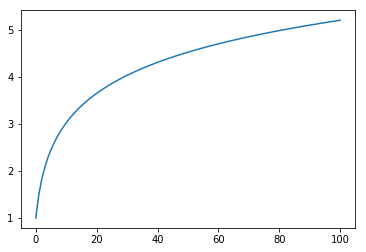

In [4]:
plt.plot(range(lilypads+1),jumps);

This graph looks generally logarithmic in nature.

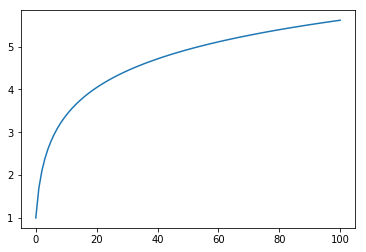

In [5]:
plt.plot(range(lilypads+1), [1+math.log(1+i) for i in range(lilypads+1)]);

## Fitting a curve

Since this looks logarithmic in nature, let's try to fit a curve using linear regression with an engineered feature, i.e. let's fit 
$$\log(1 + \rm{lilypads})$$ 
versus the number of jumps.

In [6]:
r = np.linspace(0,lilypads,lilypads+1)

X = np.log(r+1).reshape(-1,1)

In [7]:
linreg = LinearRegression()

In [8]:
linreg.fit(X,jumps)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
linreg.coef_

array([0.95617569])

In [10]:
linreg.intercept_

0.7614930210085502

In [11]:
linreg.score(X,jumps)

0.9987889695997566

Given the above it seems that $J_n \sim \ln(n+1)$, meaning the ratio of these two numbers seems to go to 1 as $n \rightarrow \infty$.